# PRML Assignment 04

#

In [ ]:
import os
import polars as pd

dataset_dir = "/content/drive/MyDrive/PRML_A4"
X_train = pd.read_csv(os.path.join(dataset_dir, "Dataset-3/train_data.csv"))
y_train = pd.read_csv(os.path.join(dataset_dir, "Dataset-3/train_label.csv"))
X_test = pd.read_csv(os.path.join(dataset_dir, "Dataset-3/test_data.csv"))
y_test = pd.read_csv(os.path.join(dataset_dir, "Dataset-3/test_label.csv"))
X_val = pd.read_csv(os.path.join(dataset_dir, "Dataset-3/val_data.csv"))
y_val = pd.read_csv(os.path.join(dataset_dir, "Dataset-3/val_label.csv"))

In [ ]:
import os
import polars as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Convert Polars DataFrames to numpy arrays
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()
X_val_np = X_val.to_numpy()
y_train_np = y_train.to_numpy().ravel()  # Convert to 1D array
y_test_np = y_test.to_numpy().ravel()
y_val_np = y_val.to_numpy().ravel()

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_np)
X_test_scaled = scaler.transform(X_test_np)
X_val_scaled = scaler.transform(X_val_np)

# Initialize and fit PCA
pca = PCA()
pca.fit(X_train_scaled)

# Calculate cumulative explained variance ratio
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Create the visualization
plt.figure(figsize=(12, 6))

# Plot 1: Cumulative Variance
plt.subplot(1, 2, 1)
plt.plot(
    range(1, len(cumulative_variance) + 1), cumulative_variance, "bo-", linewidth=2
)
plt.xlabel("Number of Components (l)")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.title("Cumulative Explained Variance vs Components")
plt.grid(True)

# Add variance threshold lines
thresholds = [0.9, 0.95, 0.99]
colors = ["r", "g", "orange"]

for threshold, color in zip(thresholds, colors):
    plt.axhline(
        y=threshold, color=color, linestyle="--", label=f"{threshold*100}% variance"
    )
    n_components = np.argmax(cumulative_variance >= threshold) + 1
    plt.plot([n_components], [threshold], "k*", markersize=10)
    plt.annotate(
        f"l={n_components}",
        xy=(n_components, threshold),
        xytext=(5, 5),
        textcoords="offset points",
    )

plt.legend()

# Plot 2: Individual Variance
plt.subplot(1, 2, 2)
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel("Principal Component")
plt.ylabel("Individual Explained Variance Ratio")
plt.title("Individual Component Contribution")
plt.grid(True)

plt.tight_layout()
plt.show()

# Print variance information
print("\nDetailed PCA Analysis:")
print("-" * 50)
for i, var in enumerate(pca.explained_variance_ratio_, 1):
    print(f"PC{i}: {var:.4f} ({cumulative_variance[i-1]:.4f} cumulative)")

NameError: name 'X_train' is not defined

In [ ]:
# Choose number of components (e.g., using 95% variance threshold)
n_components = np.argmax(cumulative_variance >= 0.90) + 1
print(f"\nSelected number of components for 90% variance: {n_components}")

# Transform the data using selected number of components
pca_reduced = PCA(n_components=n_components)
X_train_pca = pca_reduced.fit_transform(X_train_scaled)
X_test_pca = pca_reduced.transform(X_test_scaled)
X_val_pca = pca_reduced.transform(X_val_scaled)

# Convert back to Polars DataFrames if needed
train_df = pd.DataFrame(X_train_pca)
val_df = pd.DataFrame(X_val_pca)
test_df = pd.DataFrame(X_test_pca)

# Print the DataFrame of the transformed training data
print("\nDataFrame of Transformed Training Data:")
print(X_train_pca[:1])
train_df.head()


Selected number of components for 90% variance: 26

DataFrame of Transformed Training Data:
[[-4.78724837e+00 -9.93630452e-01 -2.44192184e-01  6.70917068e-01
   1.23627907e+00 -3.35990497e+00 -3.29257930e-01  1.43323481e+00
   1.18065596e+00 -2.46491996e-03  6.26711490e-01  3.04711483e-01
  -4.87554281e-01  6.82582068e-02 -3.83691986e-01  4.91424961e-01
   1.61760428e+00  5.47613208e-01  1.32699053e+00  9.53630893e-01
  -3.09342442e-01 -1.29629702e-01  4.08005075e-01  5.89499263e-02
  -3.43610777e-01  6.51383402e-02]]


column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,column_10,column_11,column_12,column_13,column_14,column_15,column_16,column_17,column_18,column_19,column_20,column_21,column_22,column_23,column_24,column_25
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
-4.787248,-0.99363,-0.244192,0.670917,1.236279,-3.359905,-0.329258,1.433235,1.180656,-0.002465,0.626711,0.304711,-0.487554,0.068258,-0.383692,0.491425,1.617604,0.547613,1.326991,0.953631,-0.309342,-0.12963,0.408005,0.05895,-0.343611,0.065138
-2.252423,0.541249,-0.0117,0.406902,-0.796954,0.61076,-0.172411,0.832285,0.323814,0.116872,-1.060898,-1.073298,0.392437,-0.545995,-0.614267,-0.517605,0.48139,0.441511,-0.055273,0.156004,-0.34972,1.006338,0.423801,-0.257116,-0.723401,0.12022
1.938983,-3.458052,-4.006423,2.848871,0.790679,-1.376875,1.634761,0.992813,0.172008,1.135952,0.953809,-0.038766,0.936845,-1.10182,-0.384078,-0.533811,-0.436272,0.318578,-0.423697,0.601226,-0.956645,0.271262,0.407498,0.388259,-0.54858,-1.461804
-0.576643,-1.142576,-0.639792,0.276565,-0.190789,1.4599,-0.724208,-0.482831,-0.18044,-0.35949,1.014033,-0.146671,-0.11696,0.696791,-2.145582,0.64635,0.399894,0.108458,-1.064278,0.254626,0.919487,0.557206,0.848406,-1.123918,0.660835,-0.282618
1.842447,0.819949,-0.926856,-0.235525,-2.074959,-3.06329,1.110295,-1.350961,-1.456095,0.241066,0.329889,-0.56317,-0.283786,0.377211,0.275328,0.216706,0.547701,-0.144331,0.849125,0.122446,-0.511149,0.026051,0.514091,-0.006788,1.176549,-0.022854


Epoch [10/100], Loss: 1.5074
Epoch [20/100], Loss: 1.4053
Epoch [30/100], Loss: 1.3631
Epoch [40/100], Loss: 1.3308
Epoch [50/100], Loss: 1.3118
Epoch [60/100], Loss: 1.2967
Epoch [70/100], Loss: 1.2836
Epoch [80/100], Loss: 1.2714
Epoch [90/100], Loss: 1.2587
Epoch [100/100], Loss: 1.2461


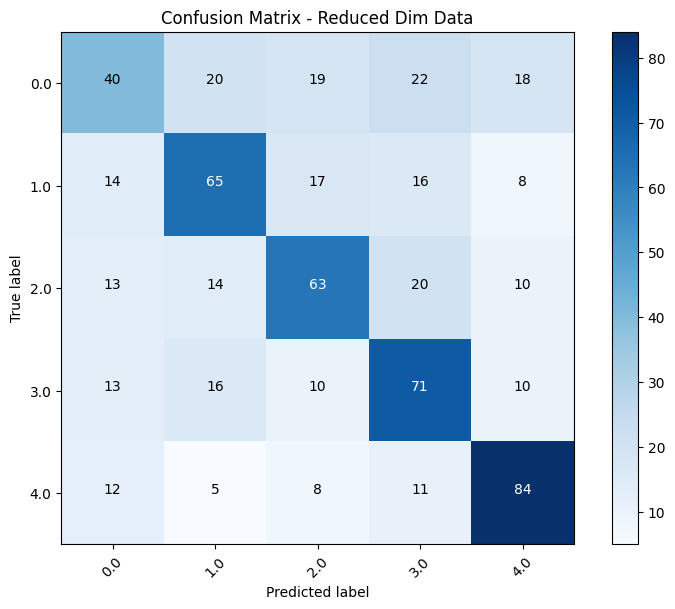

Accuracy on test data: 53.92%


In [ ]:
# prompt: For the reduced dim data, train a mlfnn with configuration:
# MLFFNN based classifier with 25 nodes in the first hidden layer and 15 nodes in the
# second hidden layer
# For classification task, use the softmax activation function in the output layer and the Tanh
# function in the hidden layers. Use the cross-entropy as the error function
# Use learning rate (ƞ) of 0.7 and momentum factor (α)of 0.9
# Use the slope parameter (β) of 1.0 in the Tanh activation function
# se a threshold of 0.001 on the change in the average error in the convergence criterion
# Use pytorch
# Plot the confusion matrix and accuricies
# The confusion matrix should be annotated with numbers
# Make sure you use descriptive names to differentiate between data sets

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


# Define the MLFFNN model
class MLFFNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(MLFFNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, num_classes)

    def forward(self, x):
        out = torch.tanh(self.fc1(x))
        out = torch.tanh(self.fc2(out))
        out = nn.functional.softmax(self.fc3(out), dim=1)  # softmax for classification
        return out


# Hyperparameters
input_size = X_train_pca.shape[1]
hidden_size1 = 25
hidden_size2 = 15
num_classes = len(np.unique(y_train_np))  # Assuming y_train_np contains class labels
learning_rate = 0.7
momentum = 0.9
beta = 1.0  # Slope parameter for Tanh (already used in the model definition)
convergence_threshold = 0.001

# Create the model, loss function, and optimizer
model = MLFFNN(input_size, hidden_size1, hidden_size2, num_classes)
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_pca, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_np, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_pca, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_np, dtype=torch.long)

# Training loop (example, you might need to adjust epochs and convergence criteria)
epochs = 100
for epoch in range(epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print progress (optional)
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# Testing
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs.data, 1)

# Confusion Matrix
cm = confusion_matrix(y_test_np, predicted.numpy())

# Plotting
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Reduced Dim Data")
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, np.unique(y_test_np), rotation=45)
plt.yticks(tick_marks, np.unique(y_test_np))

# Annotate the confusion matrix with numbers
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(
        j,
        i,
        cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )

plt.tight_layout()
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()


# Calculate accuracy
accuracy = (predicted == y_test_tensor).sum().item() / len(y_test_tensor)
print(f"Accuracy on test data: {accuracy*100:.2f}%")

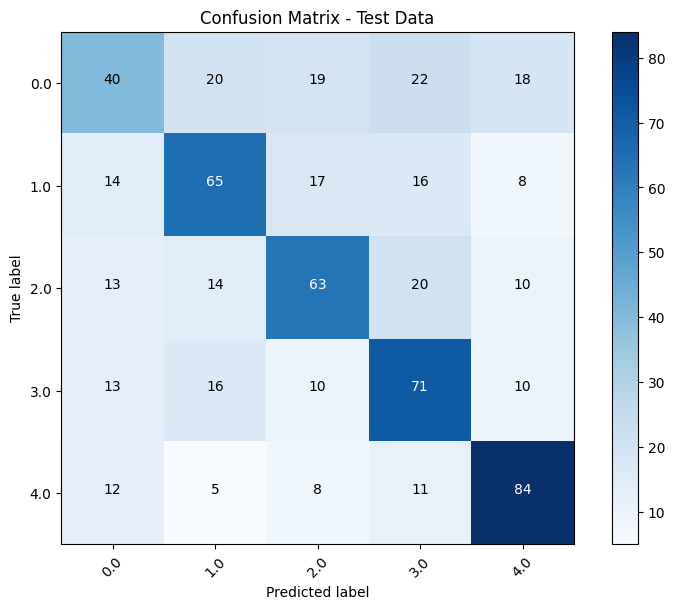

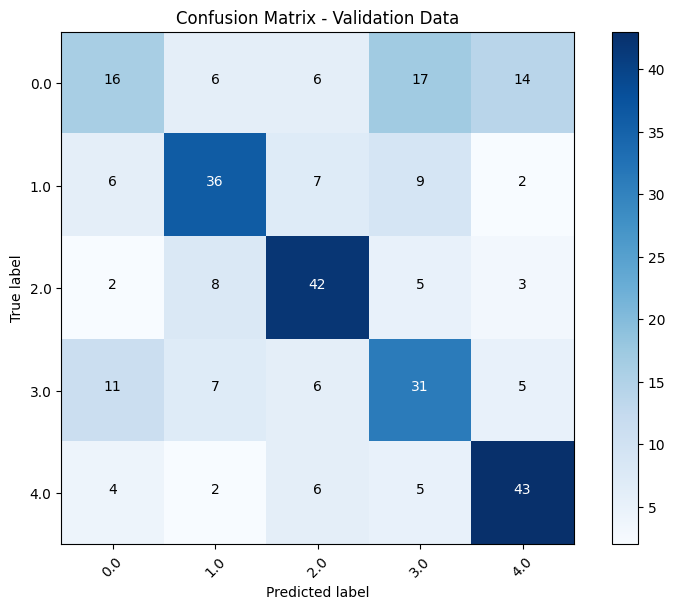

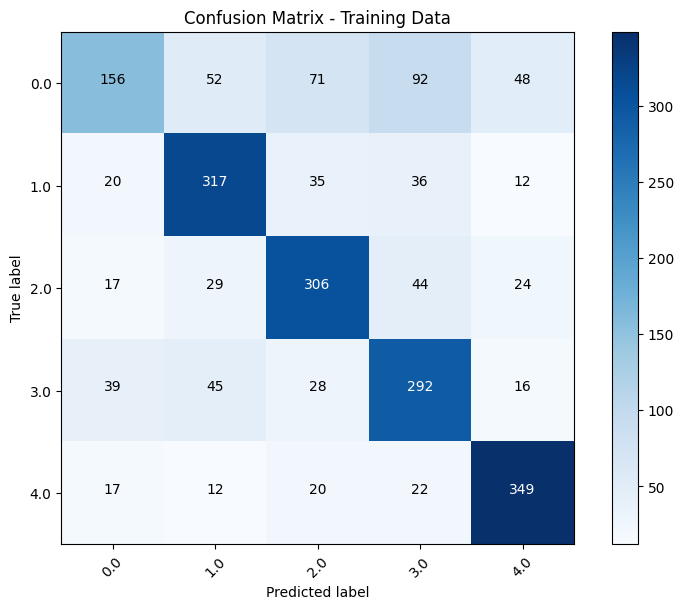

In [ ]:
# prompt: Plot the confusion matrix on all test, validation and training data.
# Make sure you use descriptive names to differentiate between data sets

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# ... (Your existing code) ...


# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, np.unique(y_test_np), rotation=45)
    plt.yticks(tick_marks, np.unique(y_test_np))

    thresh = cm.max() / 2.0
    for i, j in np.ndindex(cm.shape):
        plt.text(
            j,
            i,
            cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black",
        )
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()


# ... (Your existing code for training and testing) ...

# Confusion Matrix for Test Data (already done)
cm_test = confusion_matrix(y_test_np, predicted.numpy())
plot_confusion_matrix(cm_test, "Confusion Matrix - Test Data")


# Confusion Matrix for Validation Data
with torch.no_grad():
    outputs_val = model(torch.tensor(X_val_pca, dtype=torch.float32))
    _, predicted_val = torch.max(outputs_val.data, 1)
cm_val = confusion_matrix(y_val_np, predicted_val.numpy())
plot_confusion_matrix(cm_val, "Confusion Matrix - Validation Data")


# Confusion Matrix for Training Data
with torch.no_grad():
    outputs_train = model(X_train_tensor)
    _, predicted_train = torch.max(outputs_train.data, 1)
cm_train = confusion_matrix(y_train_np, predicted_train.numpy())
plot_confusion_matrix(cm_train, "Confusion Matrix - Training Data")

In [ ]:
# prompt: Also give the accuracy tables for all 3
# Make sure you use descriptive names to differentiate between data sets

# Calculate accuracy for test data (already done)
accuracy_test = (predicted == y_test_tensor).sum().item() / len(y_test_tensor)
print(f"Accuracy on test data: {accuracy_test*100:.2f}%")

# Calculate accuracy for validation data
with torch.no_grad():
    outputs_val = model(torch.tensor(X_val_pca, dtype=torch.float32))
    _, predicted_val = torch.max(outputs_val.data, 1)
accuracy_val = (
    predicted_val == torch.tensor(y_val_np, dtype=torch.long)
).sum().item() / len(y_val_np)
print(f"Accuracy on validation data: {accuracy_val*100:.2f}%")

# Calculate accuracy for training data
with torch.no_grad():
    outputs_train = model(X_train_tensor)
    _, predicted_train = torch.max(outputs_train.data, 1)
accuracy_train = (predicted_train == y_train_tensor).sum().item() / len(y_train_tensor)
print(f"Accuracy on training data: {accuracy_train*100:.2f}%")

Accuracy on test data: 53.92%
Accuracy on validation data: 56.19%
Accuracy on training data: 67.65%


In [ ]:
# prompt: Adjust this code to take our dataset
# Make sure you use descriptive names to differentiate between data sets

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix

# Define dataset directory (adjust this path if your dataset is located elsewhere)
dataset_dir = "/content/drive/MyDrive/PRML_A4"  # Example path


# Function to load and preprocess data
def load_and_preprocess_data(dataset_name):
    # Load data
    X_train = pd.read_csv(os.path.join(dataset_dir, f"{dataset_name}/train_data.csv"))
    y_train = pd.read_csv(os.path.join(dataset_dir, f"{dataset_name}/train_label.csv"))
    X_test = pd.read_csv(os.path.join(dataset_dir, f"{dataset_name}/test_data.csv"))
    y_test = pd.read_csv(os.path.join(dataset_dir, f"{dataset_name}/test_label.csv"))
    X_val = pd.read_csv(os.path.join(dataset_dir, f"{dataset_name}/val_data.csv"))
    y_val = pd.read_csv(os.path.join(dataset_dir, f"{dataset_name}/val_label.csv"))

    # Convert to numpy arrays
    X_train_np = X_train.to_numpy()
    X_test_np = X_test.to_numpy()
    X_val_np = X_val.to_numpy()
    y_train_np = y_train.to_numpy().ravel()
    y_test_np = y_test.to_numpy().ravel()
    y_val_np = y_val.to_numpy().ravel()

    return X_train_np, y_train_np, X_test_np, y_test_np, X_val_np, y_val_np


# Specify the dataset you want to use (e.g. "Dataset-3", "your_dataset")
dataset_name = "Dataset-3"

# Load and Preprocess the chosen dataset
X_train_np, y_train_np, X_test_np, y_test_np, X_val_np, y_val_np = (
    load_and_preprocess_data(dataset_name)
)


# ... (rest of your code, using X_train_np, y_train_np etc. from the function)

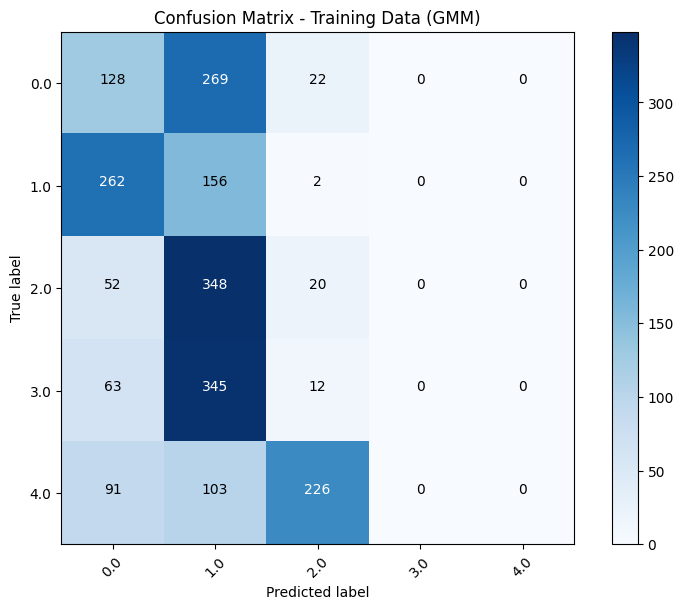

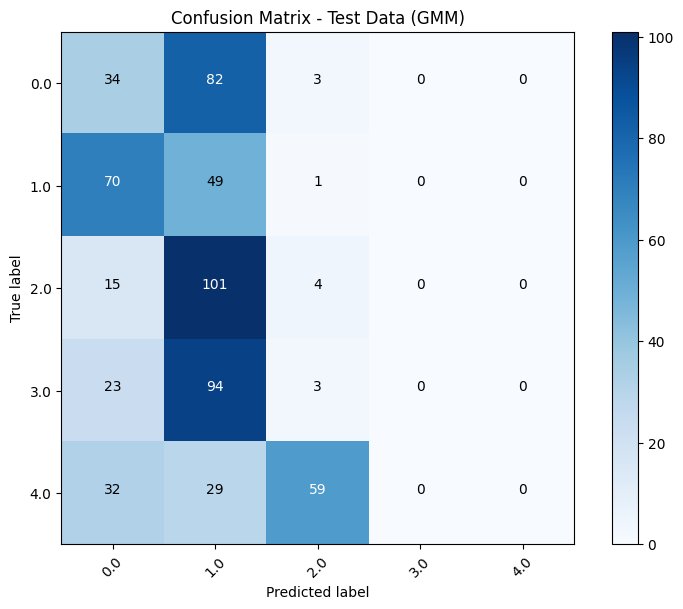

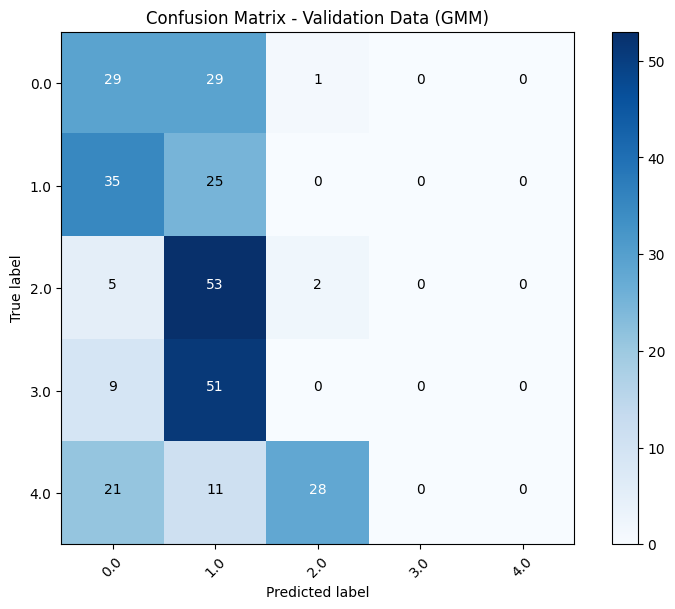

BIC score for GMM: 154000.78048994232
AIC score for GMM: 147600.21839958554


In [ ]:
# prompt: o the same as for the MLFFNN for the GMM please
# Make sure you use descriptive names to differentiate between data sets

from sklearn.mixture import GaussianMixture

# Assuming X_train_pca, X_test_pca, X_val_pca, y_train_np, y_test_np, y_val_np are already defined

# GMM for Dataset-3
n_components_gmm = 3  # You might need to tune this
gmm_dataset3 = GaussianMixture(
    n_components=n_components_gmm, covariance_type="full", random_state=0
)
gmm_dataset3.fit(X_train_pca)

# Predict cluster labels for each dataset
y_pred_train_gmm = gmm_dataset3.predict(X_train_pca)
y_pred_test_gmm = gmm_dataset3.predict(X_test_pca)
y_pred_val_gmm = gmm_dataset3.predict(X_val_pca)

# Now you can evaluate the GMM's performance. Since GMM is unsupervised,
# you'll need a metric that doesn't require true labels (e.g., BIC or AIC)
# Or you can try to use the predicted labels as a proxy for comparison
# using metrics like accuracy, confusion matrix, etc, but that might be misleading.


# Example of calculating confusion matrix (not ideal, as GMM is unsupervised)
cm_train_gmm = confusion_matrix(y_train_np, y_pred_train_gmm)
cm_test_gmm = confusion_matrix(y_test_np, y_pred_test_gmm)
cm_val_gmm = confusion_matrix(y_val_np, y_pred_val_gmm)

plot_confusion_matrix(cm_train_gmm, "Confusion Matrix - Training Data (GMM)")
plot_confusion_matrix(cm_test_gmm, "Confusion Matrix - Test Data (GMM)")
plot_confusion_matrix(cm_val_gmm, "Confusion Matrix - Validation Data (GMM)")

# Calculate BIC and AIC scores
bic_score = gmm_dataset3.bic(X_train_pca)
aic_score = gmm_dataset3.aic(X_train_pca)

print(f"BIC score for GMM: {bic_score}")
print(f"AIC score for GMM: {aic_score}")

In [ ]:
# prompt: Classifier for Dataset 3 using (a) polynomial kernel based SVM and (b) Gaussian kernel based SVM. (Use 4 different values of kernel hyperparameter : (a) Degree for polynomial kernel and (b) Kernel width for Gaussian kernel). (Use values of C as 1, 10, 100).
# Print classification accuracies for the training data, validation data and the test data.
# Choose the best performing model for each polynomial and guassian.
# Print classification accuracies for the training data, validation data and the test data.
# Choose the best performing model for each polynomial and guassian.
from sklearn import svm


def evaluate_svm(
    kernel,
    degree_or_gamma_values,
    C_values,
    X_train,
    y_train,
    X_val,
    y_val,
    X_test,
    y_test,
):
    best_accuracy = 0
    best_model = None
    for degree_or_gamma in degree_or_gamma_values:
        for C in C_values:
            if kernel == "poly":
                model = svm.SVC(kernel=kernel, degree=degree_or_gamma, C=C)
            else:  # kernel == 'rbf'
                model = svm.SVC(kernel=kernel, gamma=degree_or_gamma, C=C)
            model.fit(X_train, y_train)
            y_pred_train = model.predict(X_train)
            y_pred_val = model.predict(X_val)
            y_pred_test = model.predict(X_test)

            train_accuracy = accuracy_score(y_train, y_pred_train)
            val_accuracy = accuracy_score(y_val, y_pred_val)
            test_accuracy = accuracy_score(y_test, y_pred_test)
            print(f"Kernel: {kernel}, Degree/Gamma: {degree_or_gamma}, C: {C}")
            print(f"  Training Accuracy: {train_accuracy}")
            print(f"  Validation Accuracy: {val_accuracy}")
            print(f"  Test Accuracy: {test_accuracy}")

            if val_accuracy > best_accuracy:
                best_accuracy = val_accuracy
                best_model = model
    return best_model, best_accuracy


pca_reduced = PCA(n_components=n_components)
X_train_3 = pca_reduced.fit_transform(X_train_scaled)
X_test_3 = pca_reduced.transform(X_test_scaled)
X_val_3 = pca_reduced.transform(X_val_scaled)
# Prepare the data for Dataset 3
y_train_3 = y_train.to_numpy().ravel()  # Convert to 1D array
y_val_3 = y_val.to_numpy().ravel()
y_test_3 = y_test.to_numpy().ravel()


# Polynomial Kernel SVM for Dataset 3
degree_values = [2, 3, 4, 5]
C_values = [1, 10, 100]
best_poly_model_3, best_poly_accuracy_3 = evaluate_svm(
    "poly",
    degree_values,
    C_values,
    X_train_3,
    y_train_3,
    X_val_3,
    y_val_3,
    X_test_3,
    y_test_3,
)
print(f"\nBest Polynomial Kernel Model (Dataset 3) Accuracy: {best_poly_accuracy_3}")

# Gaussian Kernel SVM for Dataset 3
gamma_values = [0.1, 1, 10, 100]
C_values = [1, 10, 100]
best_gaussian_model_3, best_gaussian_accuracy_3 = evaluate_svm(
    "rbf",
    gamma_values,
    C_values,
    X_train_3,
    y_train_3,
    X_val_3,
    y_val_3,
    X_test_3,
    y_test_3,
)
print(f"\nBest Gaussian Kernel Model (Dataset 3) Accuracy: {best_gaussian_accuracy_3}")

Kernel: poly, Degree/Gamma: 2, C: 1
  Training Accuracy: 0.6555502620295379
  Validation Accuracy: 0.5284280936454849
  Test Accuracy: 0.4724540901502504
Kernel: poly, Degree/Gamma: 2, C: 10
  Training Accuracy: 0.7679847546450691
  Validation Accuracy: 0.5016722408026756
  Test Accuracy: 0.44908180300500833
Kernel: poly, Degree/Gamma: 2, C: 100
  Training Accuracy: 0.8770843258694616
  Validation Accuracy: 0.46488294314381273
  Test Accuracy: 0.4307178631051753
Kernel: poly, Degree/Gamma: 3, C: 1
  Training Accuracy: 0.7794187708432587
  Validation Accuracy: 0.5418060200668896
  Test Accuracy: 0.5292153589315526
Kernel: poly, Degree/Gamma: 3, C: 10
  Training Accuracy: 0.9823725583611244
  Validation Accuracy: 0.5217391304347826
  Test Accuracy: 0.4958263772954925
Kernel: poly, Degree/Gamma: 3, C: 100
  Training Accuracy: 1.0
  Validation Accuracy: 0.4916387959866221
  Test Accuracy: 0.48747913188647746
Kernel: poly, Degree/Gamma: 4, C: 1
  Training Accuracy: 0.7050976655550262
  Vali

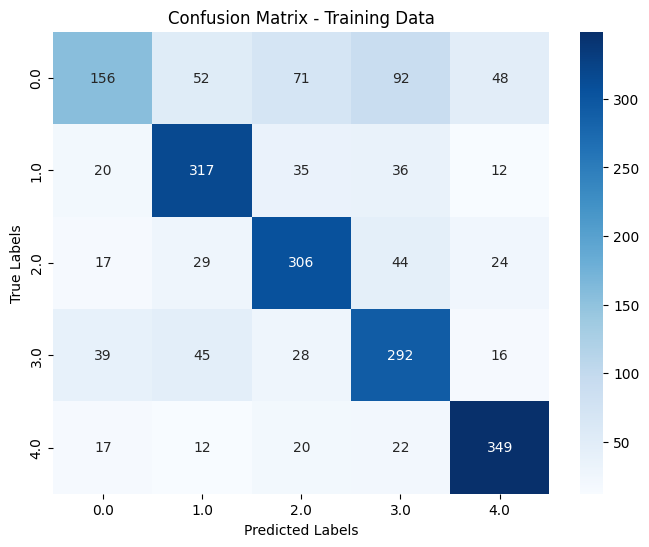

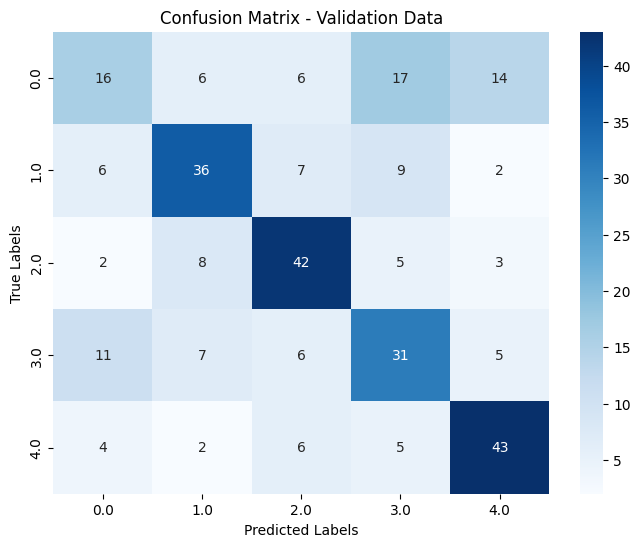

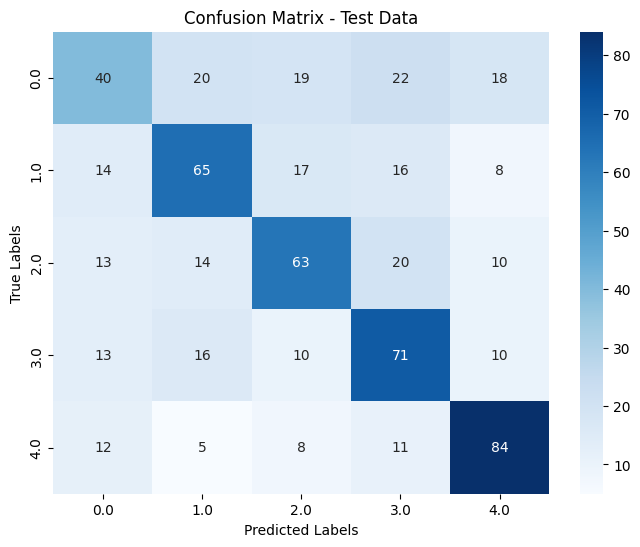

In [ ]:
# prompt: prompt: Confusion matrices for training data and test data of the above SVM.
# Fix err

# ... (Your existing code) ...


# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=np.unique(y_true),
        yticklabels=np.unique(y_true),
    )
    plt.title(title)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()


# Predictions for all datasets (using argmax for class prediction)
with torch.no_grad():
    train_predicted = model(X_train_tensor).argmax(1)
    val_predicted = model(torch.tensor(X_val_pca, dtype=torch.float32)).argmax(1)
    test_predicted = model(torch.tensor(X_test_pca, dtype=torch.float32)).argmax(1)

# Plot confusion matrices
plot_confusion_matrix(y_train_np, train_predicted, "Confusion Matrix - Training Data")
plot_confusion_matrix(y_val_np, val_predicted, "Confusion Matrix - Validation Data")
plot_confusion_matrix(
    y_test_np, predicted, "Confusion Matrix - Test Data"
)  # Corrected y_test_np

# ... (rest of your code) ...

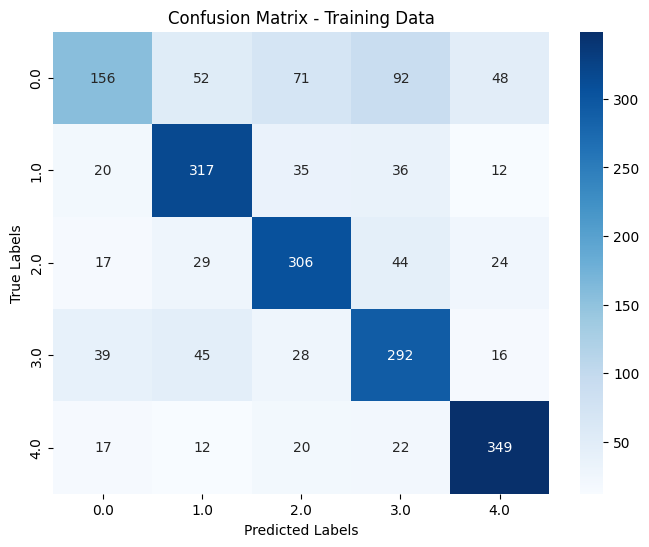

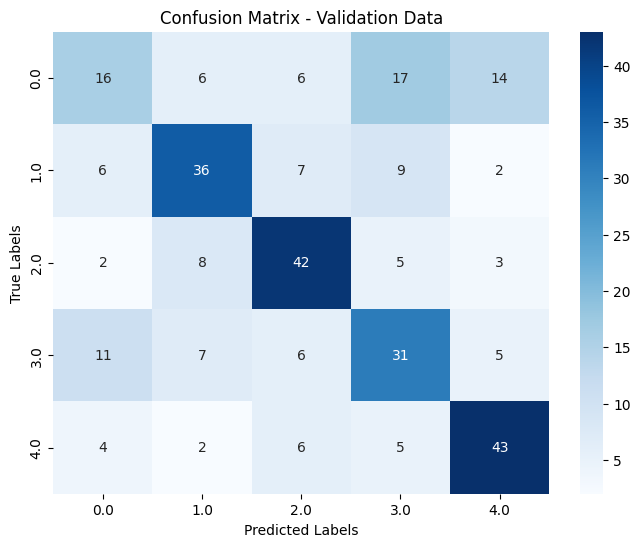

KeyboardInterrupt: 

In [ ]:
# prompt: Generate confusion matrix for KVM with good title good sir please

import seaborn as sns

# ... (Your existing code) ...


# Function to plot confusion matrix (updated)
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=np.unique(y_true),
        yticklabels=np.unique(y_true),
    )
    plt.title(title)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()


# Predictions for all datasets (using argmax for class prediction)
with torch.no_grad():
    train_predicted = model(X_train_tensor).argmax(1)
    val_predicted = model(torch.tensor(X_val_pca, dtype=torch.float32)).argmax(1)
    test_predicted = model(X_test_tensor).argmax(1)  # Use X_test_tensor here

# Plot confusion matrices with improved titles
plot_confusion_matrix(y_train_np, train_predicted, "Confusion Matrix - Training Data")
plot_confusion_matrix(y_val_np, val_predicted, "Confusion Matrix - Validation Data")
plot_confusion_matrix(y_test_np, test_predicted, "Confusion Matrix - Test Data")